importing

In [12]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout


loading images as np arrays

In [13]:
imgs_path = "Train"
data = []
labels = []
classes = 43

for i in range(classes):
    img_path = os.path.join(imgs_path, str(i))
    for img in os.listdir(img_path):
        im = Image.open(img_path+'/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


exploring sample image

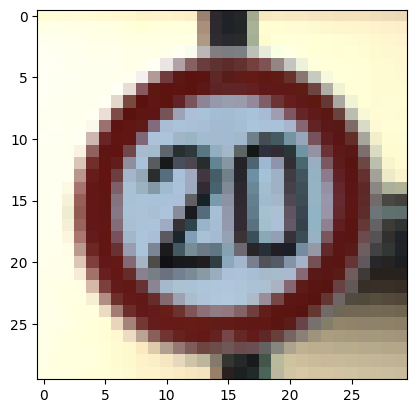

In [14]:
path = "Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30,30))
sr = np.array(img)
plt.imshow(img)
plt.show()

split dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
print("training shape: ", x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


building CNN model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

/home/user/Documents/automated_planogram_compliance/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


training and validation


In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 15
history = model.fit(x_train, y_train, epochs = epochs, batch_size = 64, validation_data = (x_test, y_test))


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.0560 - loss: 4.9687 - val_accuracy: 0.4083 - val_loss: 2.2386
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 38s 78ms/step - accuracy: 0.4669 - loss: 1.8668 - val_accuracy: 0.8664 - val_loss: 0.5521
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 38s 78ms/step - accuracy: 0.7608 - loss: 0.8021 - val_accuracy: 0.9092 - val_loss: 0.3631
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.8589 - loss: 0.4927 - val_accuracy: 0.9699 - val_loss: 0.1215
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.8992 - loss: 0.3501 - val_accuracy: 0.9759 - val_loss: 0.0925
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.9121 - loss: 0.3153 - val_accuracy: 0.9689 - val_loss: 0.0983
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.9331 - loss: 0.2361 - val_accuracy: 0.9732 - val_loss: 0.0858
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.9379 - loss: 0.2171 - 

visualization

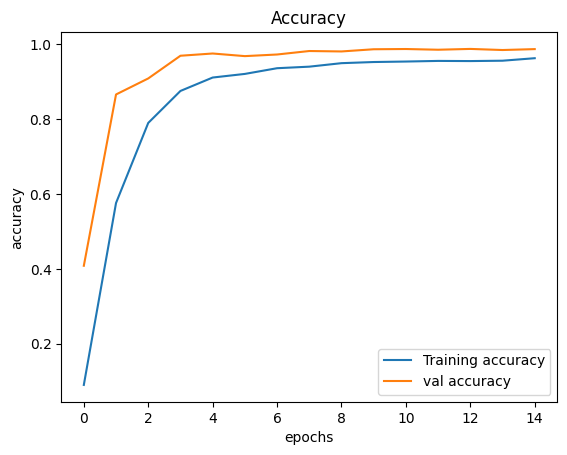

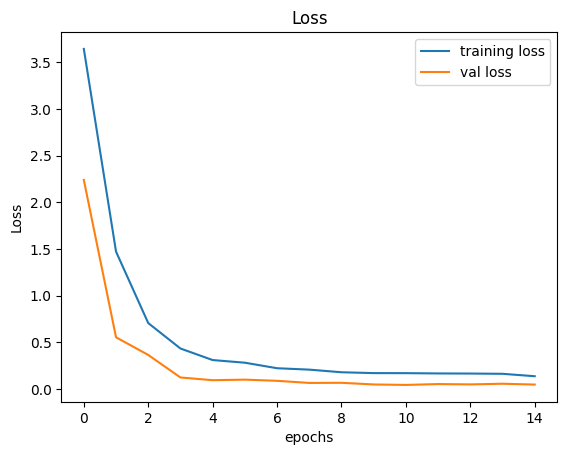

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

testing

In [37]:
from sklearn.metrics import accuracy_score

test = pd.read_csv("Test.csv")
test_labels = test['ClassId'].values
#test_img_path = "Test"
test_imgs = test['Path'].values

test_data = []
#test_labels = []

for img in test_imgs:
    im = Image.open(img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, predictions))


AttributeError: 'Sequential' object has no attribute 'predict_classes'